<a href="https://colab.research.google.com/github/HarikrishnanK9/DataSymphony/blob/main/Pneumonia_Detection_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp '/content/drive/MyDrive/Phneumonia/xray.zip' '/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
import cv2

In [ ]:
dataset_path = '/content/chest_xray/chest_xray'

In [ ]:
batch_size =16
epochs=10
input_shape = (256,256,3)
num_classes = 2


In [ ]:

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [ ]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                                  )



In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation data



In [ ]:

training_generator = train_datagen.flow_from_directory(
    '/content/chest_xray/chest_xray/train' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='categorical',
    )

Found 5216 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/chest_xray/chest_xray/val' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='categorical',
    )

Found 16 images belonging to 2 classes.


In [ ]:
testing_generator = validation_datagen.flow_from_directory(
    '/content/chest_xray/test' ,
    target_size=(256,256),
    batch_size=16,
    class_mode='categorical',
    )

Found 624 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    training_generator,
    steps_per_epoch=training_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
326/326 [==============================] - 65s 188ms/step - loss: 0.2850 - accuracy: 0.8888 - val_loss: 0.2519 - val_accuracy: 0.9375
Epoch 2/10
326/326 [==============================] - 56s 171ms/step - loss: 0.1215 - accuracy: 0.9601 - val_loss: 0.3335 - val_accuracy: 0.7500
Epoch 3/10
326/326 [==============================] - 55s 169ms/step - loss: 0.0921 - accuracy: 0.9684 - val_loss: 0.2879 - val_accuracy: 0.8125
Epoch 4/10
326/326 [==============================] - 58s 177ms/step - loss: 0.0784 - accuracy: 0.9718 - val_loss: 0.1312 - val_accuracy: 0.9375
Epoch 5/10
326/326 [==============================] - 56s 171ms/step - loss: 0.0692 - accuracy: 0.9774 - val_loss: 0.2156 - val_accuracy: 0.8750
Epoch 6/10
326/326 [==============================] - 54s 165ms/step - loss: 0.0619 - accuracy: 0.9793 - val_loss: 0.4176 - val_accuracy: 0.6875
Epoch 7/10
326/326 [==============================] - 54s 167ms/step - loss: 0.0602 - accuracy: 0.9780 - val_loss: 0.1527 - val_ac

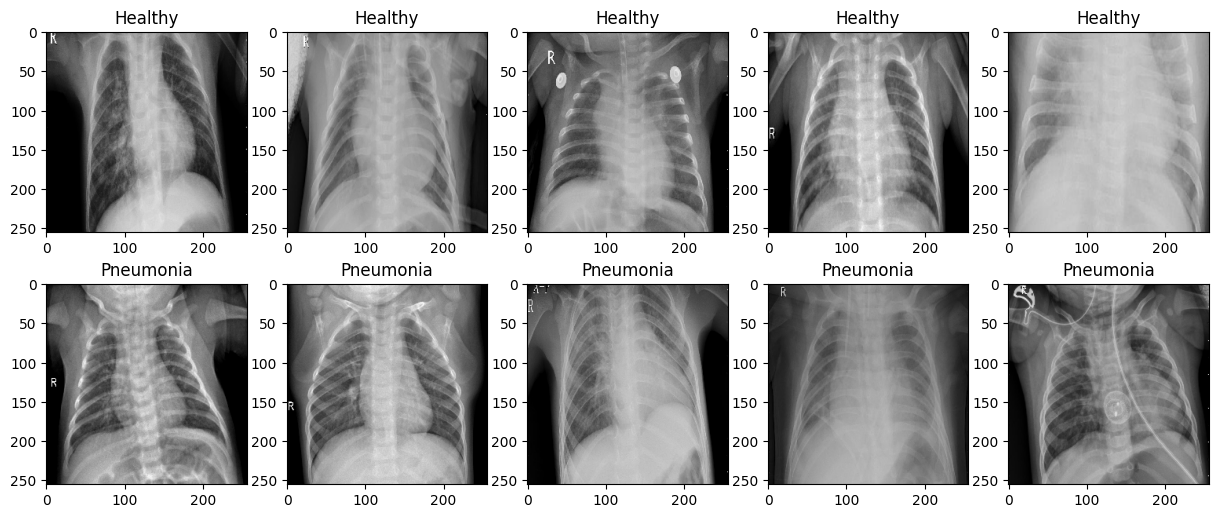

In [ ]:
import matplotlib.pyplot as plt

# Extract some images from the data generator
num_images_to_display = 5  # Number of images you want to display

# Extract images from the data generator for category 0 (e.g., healthy)
healthy_images, _ = training_generator.next()
# Extract images from the data generator for category 1 (e.g., pneumonia)
pneumonia_images, _ = training_generator.next()

# Display the images
plt.figure(figsize=(15, 6))
for i in range(num_images_to_display):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(healthy_images[i])
    plt.title("Healthy")

    plt.subplot(2, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(pneumonia_images[i])
    plt.title("Pneumonia")

In [ ]:
#evaluate the model
test_loss, test_accuracy = model.evaluate(testing_generator)
print(f'Accuracy on the test set: {test_accuracy * 100:.2f}%')

39/39 [==============================] - 6s 161ms/step - loss: 2.6621 - accuracy: 0.7292
Accuracy on the test set: 72.92%


In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(image_path): #
    img = image.load_img(image_path,target_size = input_shape) #
    img = image.img_to_array(img) #converting to array
    img = np.expand_dims(img,axis=0)  #expanding dims to match for model
    img /=255.0 #normalize
    prediction = model.predict(img)
    predicted_leaf_index = np.argmax(prediction)

    return predicted_condition_index

In [ ]:
img = '/content/chest_xray/test/NORMAL/IM-0001-0001.jpeg'

In [ ]:
# Dictionary mapping species indices to species names
disease_mapping = {
    0: 'Pneumonia',
    1: 'Normal',
}

# Example usage to identify the species from the predicted index
predicted_condition_index = predict_image(img)  # Replace this with the actual predicted index
predicted_condition_name = disease_mapping.get(predicted_condition_index, 'Unknown')

print(f'Predicted condition: {predicted_condition_name}')


1/1 [==============================] - 0s 37ms/step
Predicted condition: Normal


In [ ]:
model.save('pneumonia.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp '/content/pneumonia.h5' '/content/drive/MyDrive/Phneumonia'

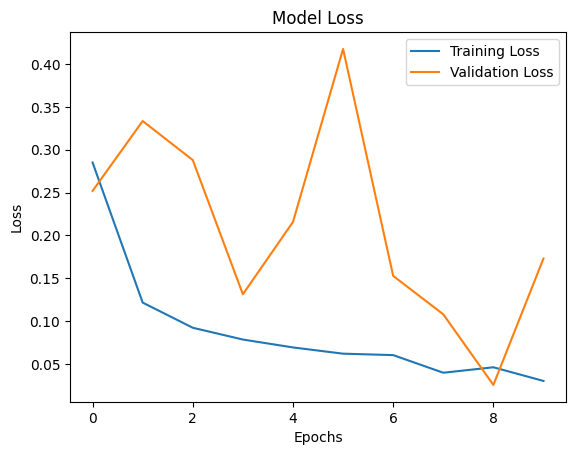

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')

# Plotting validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


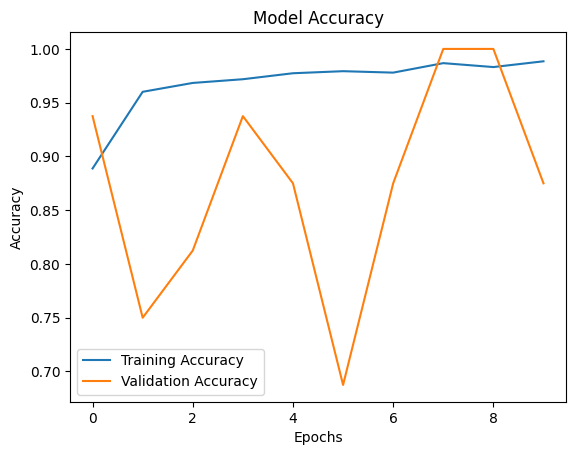

In [ ]:

# Plotting training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')

# Plotting validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['Normal Pnemounia', 'Normal tuber', 'Pnemounia', 'Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true,y_pred))